In [ ]:
import pandas as pd
import numpy as np
import datetime


In [ ]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

for col in ['vmean','vmin','vmax']:
    mode = train[col].mode()[0]
    test[col].fillna(0, inplace=True)
    test2[col].fillna(0, inplace=True)
    train[col].fillna(0, inplace=True)    
    
train = train.append(test[test.x_exit==test.x_exit])
columns=[#'hash', 'trajectory_id', 
         'time_entry', 'time_exit', 'vmax', 'vmin',
       'vmean', 'x_entry', 'y_entry', 'first', 'last',
       'x_req', 'y_req', 'x_start', 'y_start', 'distance', 'time_start',
       'time_delta', 'time_total', 'city_start', 'city_now', 'city_was',
       'x_dir', 'y_dir', 'len',
         #'distance_to_city', 'speed','x_exit', 'y_exit', 
        ]
x_train = train[columns]
x_test = test2[columns]


y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
x_train.info()

In [4]:
y_train.info()

In [9]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

_eps = 175
_min_samples = 50

columns=['x_entry','y_entry']
data=train[columns]
trainend=np.shape(data)[0]
#data=data.append(test[columns])
#testend=np.shape(data)[0]
data=data.append(test2[columns])






In [10]:
_min_samples=40
_eps=190

c = DBSCAN(eps=_eps,
            min_samples=_min_samples,
            n_jobs=-1
            ).fit_predict(data)

labels=list(np.unique(c))
clusters=len(labels)
train_c=c[:trainend]
#test_c=c[trainend:testend]
test2_c=c[trainend:]
x_train['cluster']=train_c
x_test['cluster']=test2_c

clusters


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1429

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


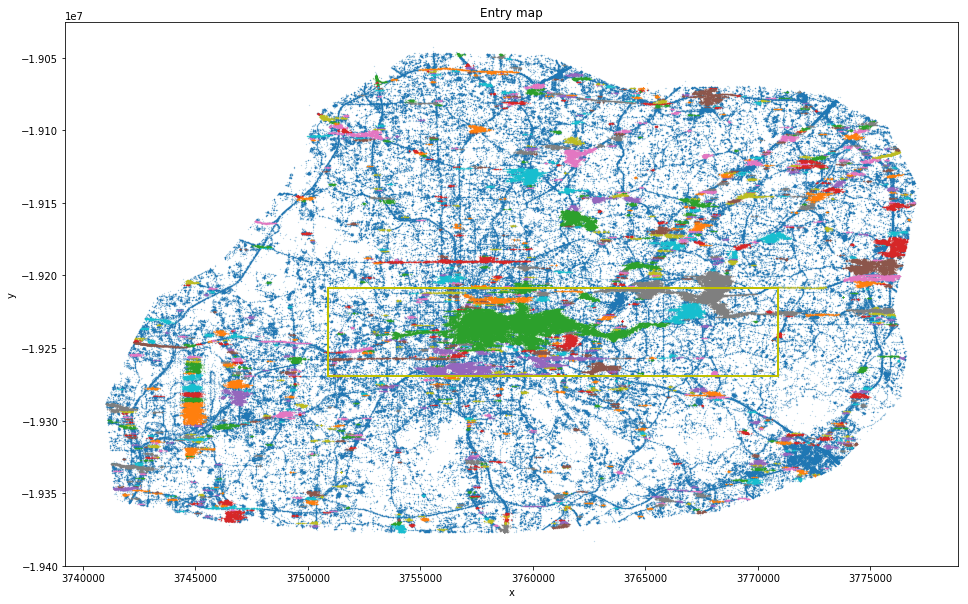

In [11]:
data=train[columns]
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


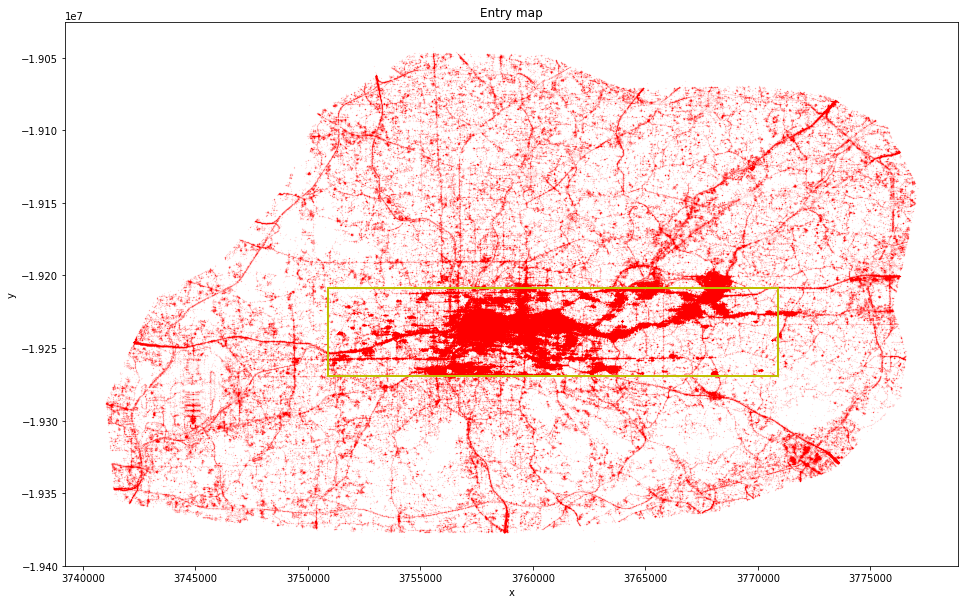

In [12]:

proba=[]
for c in labels:
    mean = np.mean(y_train[train_c==c].y)
    mean= mean #+ (0.2*(1-mean))
    proba.append(mean)
c_proba = pd.DataFrame({'c':labels,'proba':proba})



data=train[columns]

#train_c=kmeans.predict(data)
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    #print(str(c_proba[c_proba.c==c]['proba'].values[0]))
    ax.scatter(data[data.c==c].x_entry.values,
               data[data.c==c].y_entry.values,
               #c=str(c_proba[c_proba.c==c]['proba'].values[0]),
               c="r",
               alpha=str(c_proba[c_proba.c==c]['proba'].values[0]),
               s=.05)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()

D:\Anaconda\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[1]	train's binary_logloss: 0.602178	train's f1: 0
[2]	train's binary_logloss: 0.594112	train's f1: 0
[3]	train's binary_logloss: 0.586256	train's f1: 0
[4]	train's binary_logloss: 0.5786	train's f1: 0
[5]	train's binary_logloss: 0.571134	train's f1: 0
[6]	train's binary_logloss: 0.563854	train's f1: 0
[7]	train's binary_logloss: 0.556746	train's f1: 0
[8]	train's binary_logloss: 0.549811	train's f1: 0
[9]	train's binary_logloss: 0.543032	train's f1: 0
[10]	train's binary_logloss: 0.536413	train's f1: 0
[11]	train's binary_logloss: 0.529939	train's f1: 0
[12]	train's binary_logloss: 0.52361	train's f1: 0
[13]	train's binary_logloss: 0.51742	train's f1: 0
[14]	train's binary_logloss: 0.511359	train's f1: 0
[15]	train's binary_logloss: 0.505428	train's f1: 0
[16]	train's binary_logloss: 0.49962	train's f1: 0
[17]	train's binary_logloss: 0.493929	train's f1: 0
[18]	train's binary_logloss: 0.488361	train's f1: 0
[19]	train's binary_logloss: 0.482902	train's f1: 0
[20]	train's binary_loglos

[144]	train's binary_logloss: 0.186581	train's f1: 0.92593
[145]	train's binary_logloss: 0.185624	train's f1: 0.926016
[146]	train's binary_logloss: 0.184676	train's f1: 0.92611
[147]	train's binary_logloss: 0.18374	train's f1: 0.926166
[148]	train's binary_logloss: 0.182816	train's f1: 0.926228
[149]	train's binary_logloss: 0.181898	train's f1: 0.926299
[150]	train's binary_logloss: 0.180993	train's f1: 0.926334
[151]	train's binary_logloss: 0.180098	train's f1: 0.926415
[152]	train's binary_logloss: 0.179213	train's f1: 0.926483
[153]	train's binary_logloss: 0.178338	train's f1: 0.92653
[154]	train's binary_logloss: 0.177476	train's f1: 0.926621
[155]	train's binary_logloss: 0.17662	train's f1: 0.926711
[156]	train's binary_logloss: 0.175774	train's f1: 0.92677
[157]	train's binary_logloss: 0.174938	train's f1: 0.926831
[158]	train's binary_logloss: 0.174109	train's f1: 0.926894
[159]	train's binary_logloss: 0.173293	train's f1: 0.926948
[160]	train's binary_logloss: 0.172483	train's

[281]	train's binary_logloss: 0.115248	train's f1: 0.932799
[282]	train's binary_logloss: 0.114989	train's f1: 0.932848
[283]	train's binary_logloss: 0.114735	train's f1: 0.932877
[284]	train's binary_logloss: 0.114479	train's f1: 0.932924
[285]	train's binary_logloss: 0.114227	train's f1: 0.932975
[286]	train's binary_logloss: 0.113978	train's f1: 0.933026
[287]	train's binary_logloss: 0.11372	train's f1: 0.933057
[288]	train's binary_logloss: 0.113473	train's f1: 0.9331
[289]	train's binary_logloss: 0.113221	train's f1: 0.933139
[290]	train's binary_logloss: 0.112976	train's f1: 0.933191
[291]	train's binary_logloss: 0.11273	train's f1: 0.933242
[292]	train's binary_logloss: 0.112492	train's f1: 0.933286
[293]	train's binary_logloss: 0.112249	train's f1: 0.933344
[294]	train's binary_logloss: 0.112009	train's f1: 0.933385
[295]	train's binary_logloss: 0.111771	train's f1: 0.93341
[296]	train's binary_logloss: 0.111537	train's f1: 0.933459
[297]	train's binary_logloss: 0.111302	train'

[418]	train's binary_logloss: 0.0920702	train's f1: 0.93852
[419]	train's binary_logloss: 0.0919513	train's f1: 0.938561
[420]	train's binary_logloss: 0.0918418	train's f1: 0.938593
[421]	train's binary_logloss: 0.0917299	train's f1: 0.938625
[422]	train's binary_logloss: 0.0916239	train's f1: 0.938686
[423]	train's binary_logloss: 0.0915177	train's f1: 0.938731
[424]	train's binary_logloss: 0.0914112	train's f1: 0.938816
[425]	train's binary_logloss: 0.0913025	train's f1: 0.938854
[426]	train's binary_logloss: 0.0911912	train's f1: 0.938886
[427]	train's binary_logloss: 0.0910888	train's f1: 0.938927
[428]	train's binary_logloss: 0.0909815	train's f1: 0.938976
[429]	train's binary_logloss: 0.0908741	train's f1: 0.939025
[430]	train's binary_logloss: 0.0907679	train's f1: 0.939099
[431]	train's binary_logloss: 0.0906641	train's f1: 0.939177
[432]	train's binary_logloss: 0.0905578	train's f1: 0.939216
[433]	train's binary_logloss: 0.0904569	train's f1: 0.939232
[434]	train's binary_logl

[553]	train's binary_logloss: 0.0804571	train's f1: 0.94492
[554]	train's binary_logloss: 0.0803942	train's f1: 0.94497
[555]	train's binary_logloss: 0.0803249	train's f1: 0.945006
[556]	train's binary_logloss: 0.0802532	train's f1: 0.945023
[557]	train's binary_logloss: 0.0801863	train's f1: 0.945094
[558]	train's binary_logloss: 0.0801207	train's f1: 0.945136
[559]	train's binary_logloss: 0.0800543	train's f1: 0.945221
[560]	train's binary_logloss: 0.0799874	train's f1: 0.945235
[561]	train's binary_logloss: 0.0799245	train's f1: 0.945248
[562]	train's binary_logloss: 0.079855	train's f1: 0.945277
[563]	train's binary_logloss: 0.0797885	train's f1: 0.945308
[564]	train's binary_logloss: 0.0797243	train's f1: 0.945356
[565]	train's binary_logloss: 0.0796599	train's f1: 0.945395
[566]	train's binary_logloss: 0.0795923	train's f1: 0.945438
[567]	train's binary_logloss: 0.0795317	train's f1: 0.945499
[568]	train's binary_logloss: 0.0794678	train's f1: 0.945516
[569]	train's binary_loglos

[688]	train's binary_logloss: 0.072649	train's f1: 0.95051
[689]	train's binary_logloss: 0.0726066	train's f1: 0.950543
[690]	train's binary_logloss: 0.0725533	train's f1: 0.950558
[691]	train's binary_logloss: 0.0725039	train's f1: 0.95059
[692]	train's binary_logloss: 0.0724621	train's f1: 0.950627
[693]	train's binary_logloss: 0.072412	train's f1: 0.950695
[694]	train's binary_logloss: 0.0723633	train's f1: 0.950726
[695]	train's binary_logloss: 0.0723227	train's f1: 0.950779
[696]	train's binary_logloss: 0.072267	train's f1: 0.950841
[697]	train's binary_logloss: 0.0722162	train's f1: 0.950893
[698]	train's binary_logloss: 0.0721618	train's f1: 0.950922
[699]	train's binary_logloss: 0.0721173	train's f1: 0.950979
[700]	train's binary_logloss: 0.072063	train's f1: 0.951039
[701]	train's binary_logloss: 0.0720191	train's f1: 0.951083
[702]	train's binary_logloss: 0.071972	train's f1: 0.951119
[703]	train's binary_logloss: 0.071919	train's f1: 0.951158
[704]	train's binary_logloss: 0.

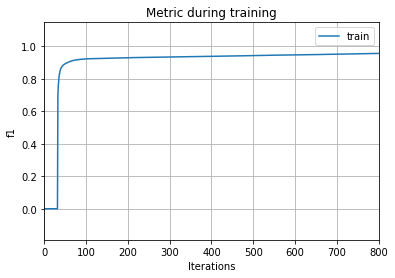

In [13]:
import lightgbm as lgb
from sklearn.metrics import f1_score

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_boost_round':800,
    'num_leaves' : 1000,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss', 
    'num_threads':8
    }

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

def lgbm_trainer():
    
    #Initialization
    evals_result = {}
    d_train = lgb.Dataset(x_train, label=y_train.y.values)

    #Learning
    clf = lgb.train(params, d_train,valid_sets=[d_train], valid_names=['train'],feval=lgb_f1_score,evals_result=evals_result) 
    
    #Prediction
    target=list(clf.predict(x_test))
    
    #Evaluate
    lgb.plot_metric(evals_result, metric='f1')

    return target
  
    
city_lgbm_proba = lgbm_trainer()   

In [14]:



def score(x):
    if x>=0.5:
        return 1
    else:
        return 0

city_sqrt = [within_measure(x, y) for x,y in zip(test2['x_entry'].values ,test2['y_entry'].values)]

city_lgbm = [score(x) for x in city_lgbm_proba]


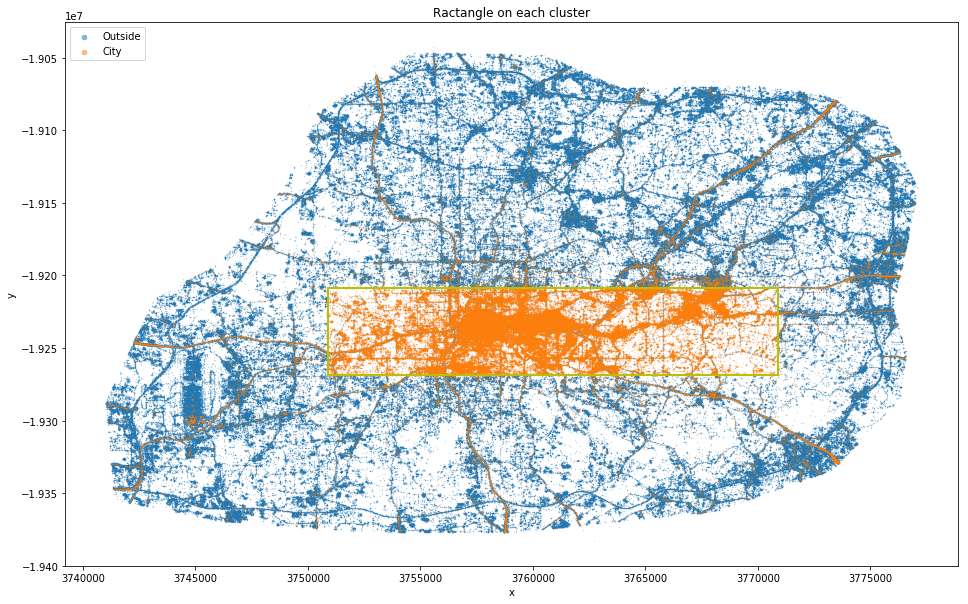

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)



leg=['Outside','City']
# Plot
for data in [train[y_train.y.values==0],train[y_train.y.values==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Ractangle on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


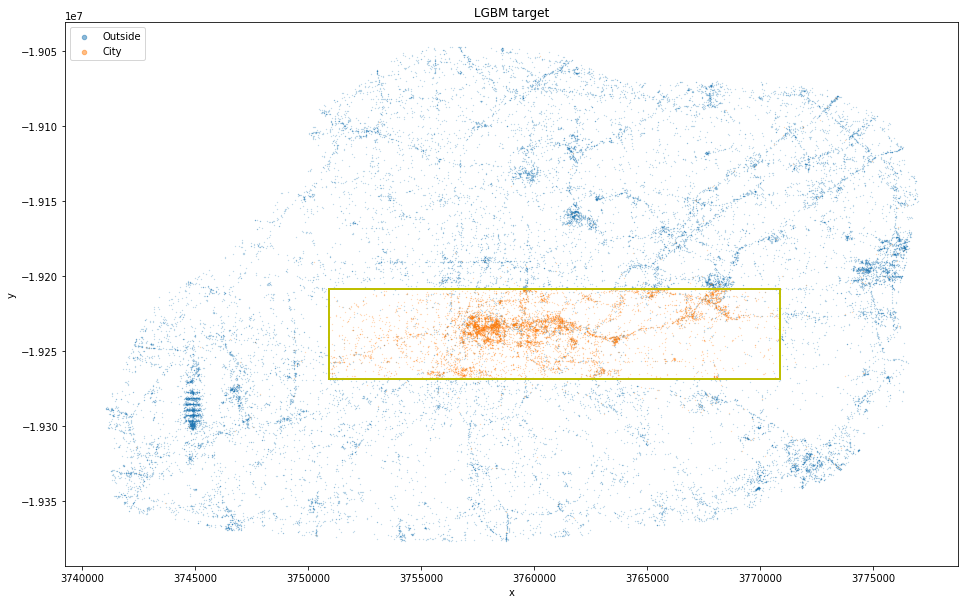

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city_lgbm

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM target')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


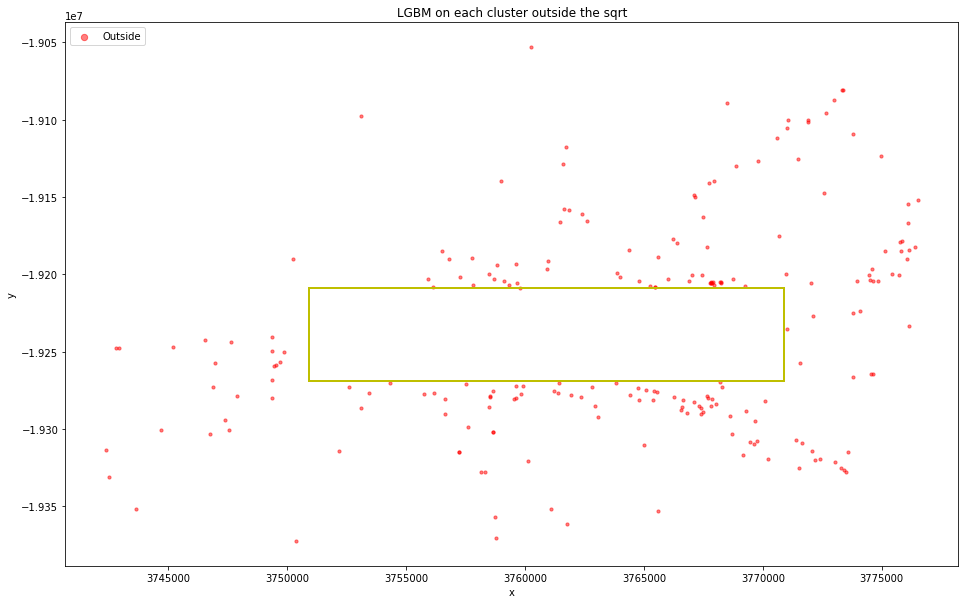

In [17]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['sqrt']=city_sqrt
df['target']=city_lgbm
df=df[df.sqrt==0]
leg=['Outside','City']
# Plot
for data in [df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM on each cluster outside the sqrt')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()

In [19]:
submission= pd.DataFrame()

submission['id']=test2['trajectory_id']
submission['target'] = city_lgbm
submission.to_csv('./output/submission/lgbm_800.csv',index=False)    
submission[:20]

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0
5,traj_0006535be25bb52dd06983447880c964_5_12,0
6,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,1
7,traj_00093ae562586aed0e053b8431e8ace4_23_10,0
8,traj_000c739e444a70e1804d757a0580caaa_31_3,1
9,traj_000d479078af08618bddc7f09082b8c3_11_6,0
